In [45]:
# Import Libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [46]:
#importing dataset
glass=pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Exploratory data analysis(EDA)

In [47]:
#check the shape of the data set
glass.shape

(214, 10)

In [48]:
#describ the data
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [49]:
#information of the dataset
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [50]:
# check any null values is there in data set
glass.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [51]:
#check any duplicated values is there
glass.duplicated().any()

True

In [52]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [53]:
#drop duplicated values
glass.drop_duplicates(inplace=True)

In [55]:
glass.duplicated().sum()

0

# Data Visualization

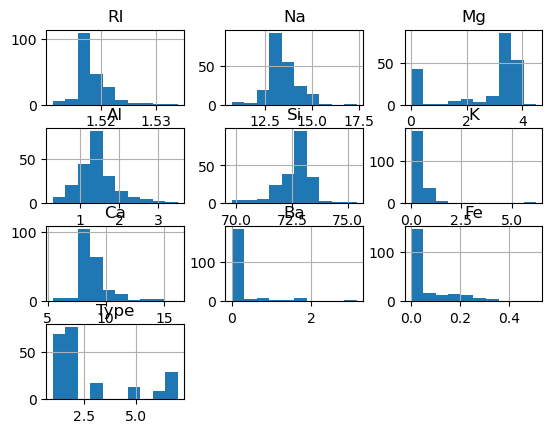

In [60]:
glass.hist();

<Axes: ylabel='Density'>

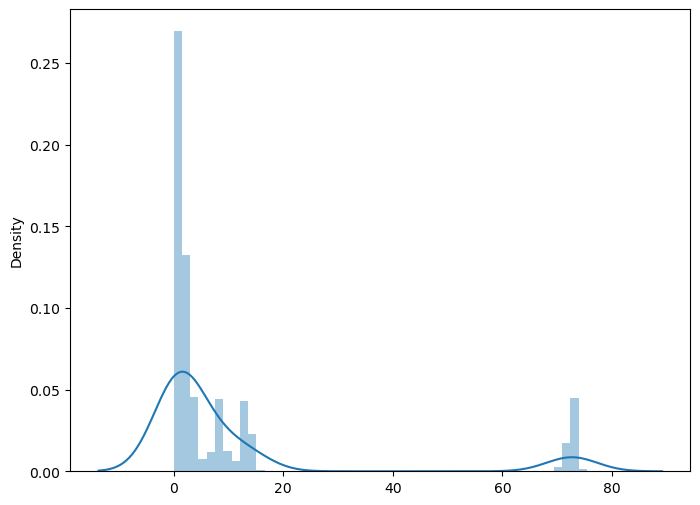

In [65]:
plt.figure(figsize=(8,6))
sns.distplot(glass)

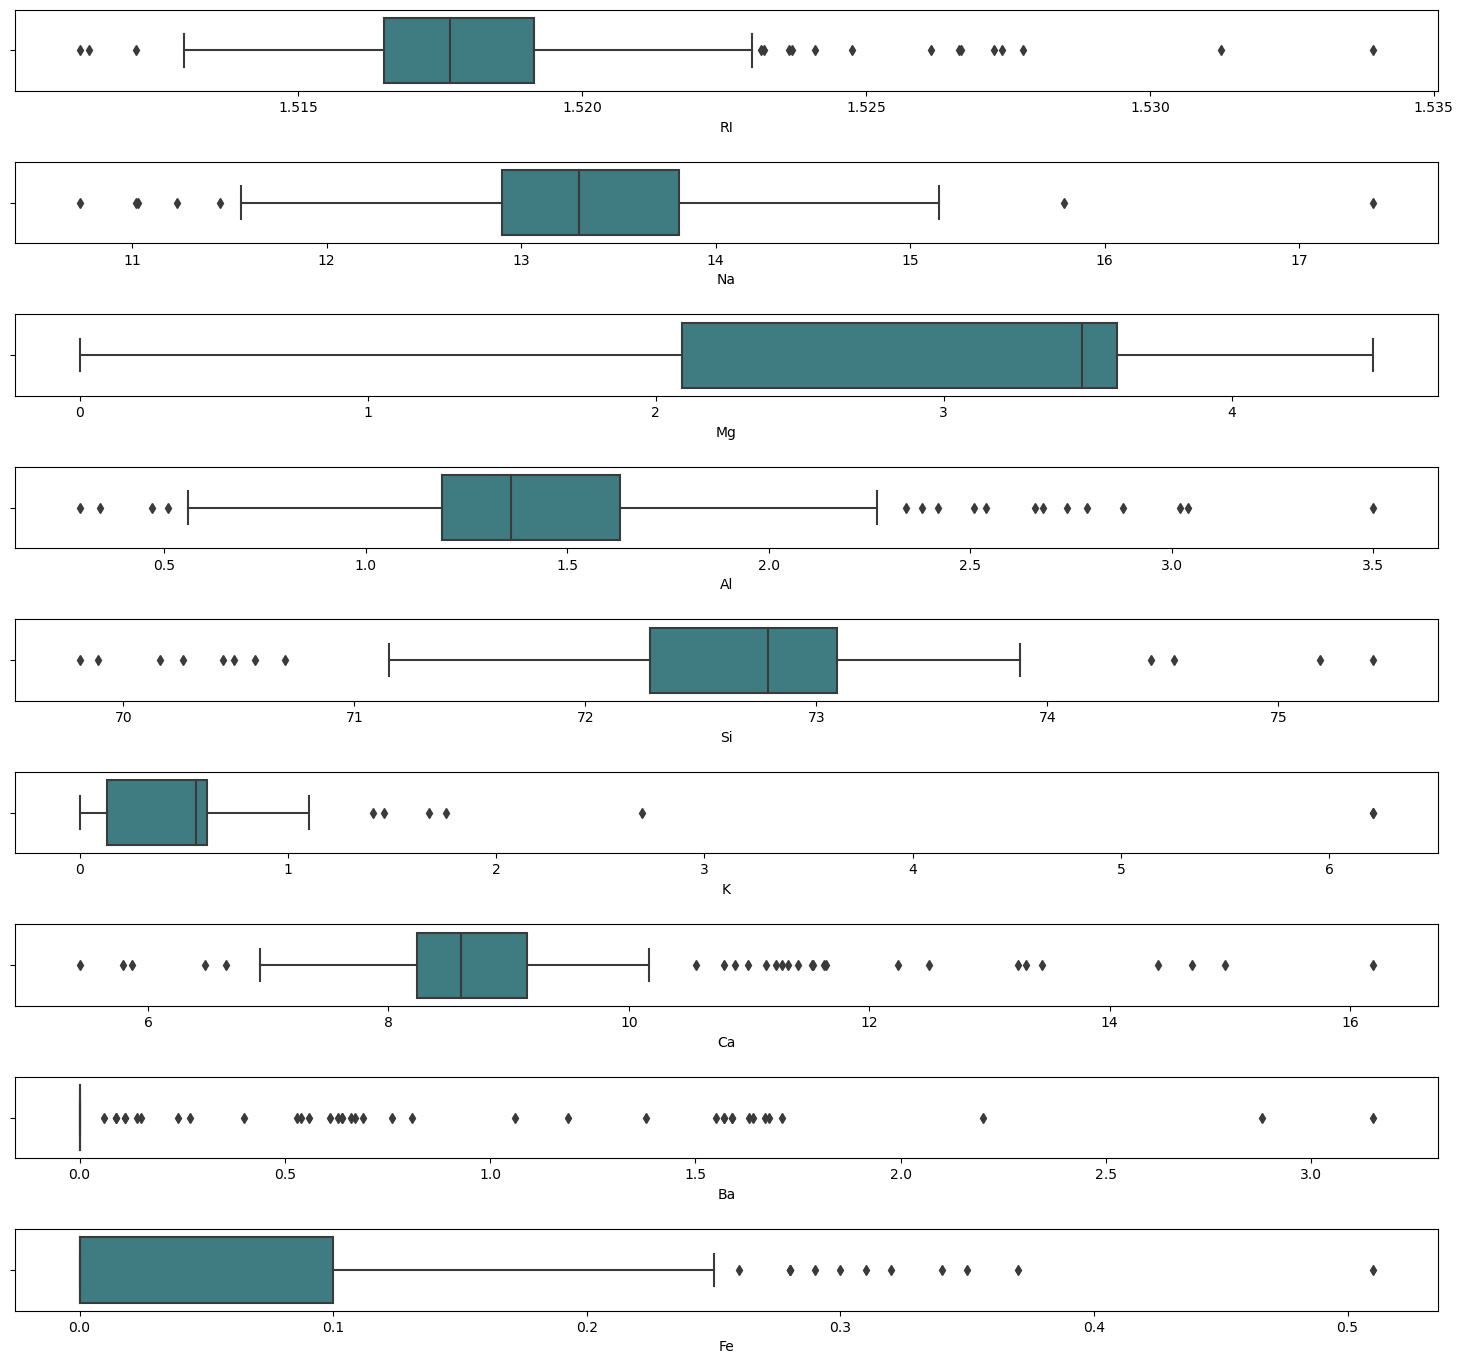

In [14]:
ot=glass.copy()
fig,axs=plt.subplots(9,1,figsize=(15,14),sharex=False,sharey=False,)
sns.boxplot(x='RI',data=ot,palette='crest',ax=axs[0])
sns.boxplot(x='Na',data=ot,palette='crest',ax=axs[1])
sns.boxplot(x='Mg',data=ot,palette='crest',ax=axs[2])
sns.boxplot(x='Al',data=ot,palette='crest',ax=axs[3])
sns.boxplot(x='Si',data=ot,palette='crest',ax=axs[4])
sns.boxplot(x='K',data=ot,palette='crest',ax=axs[5])
sns.boxplot(x='Ca',data=ot,palette='crest',ax=axs[6])
sns.boxplot(x='Ba',data=ot,palette='crest',ax=axs[7])
sns.boxplot(x='Fe',data=ot,palette='crest',ax=axs[8])
plt.tight_layout(pad=2.0)
plt.show()

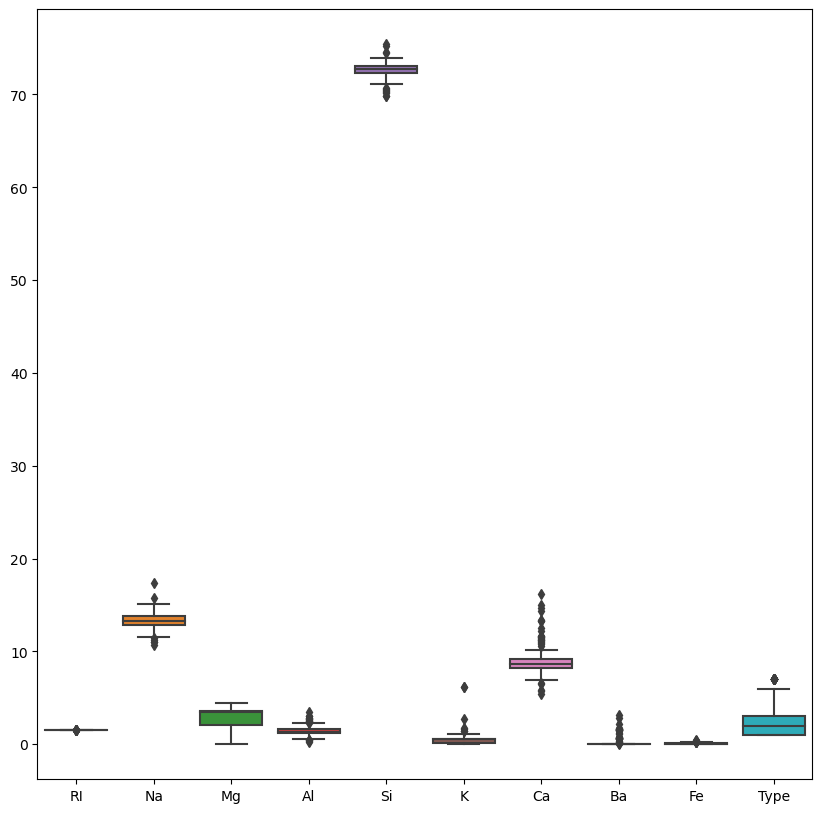

In [68]:
#outlier
plt.figure(figsize=(10,10))
sns.boxplot(data=glass, orient="v");

#Unsurprisingly, Silicon has a mean that is much superior to the other constituents as we already saw in the previous section. Well, that is normal since glass is mainly based on silica.

In [16]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<Axes: >

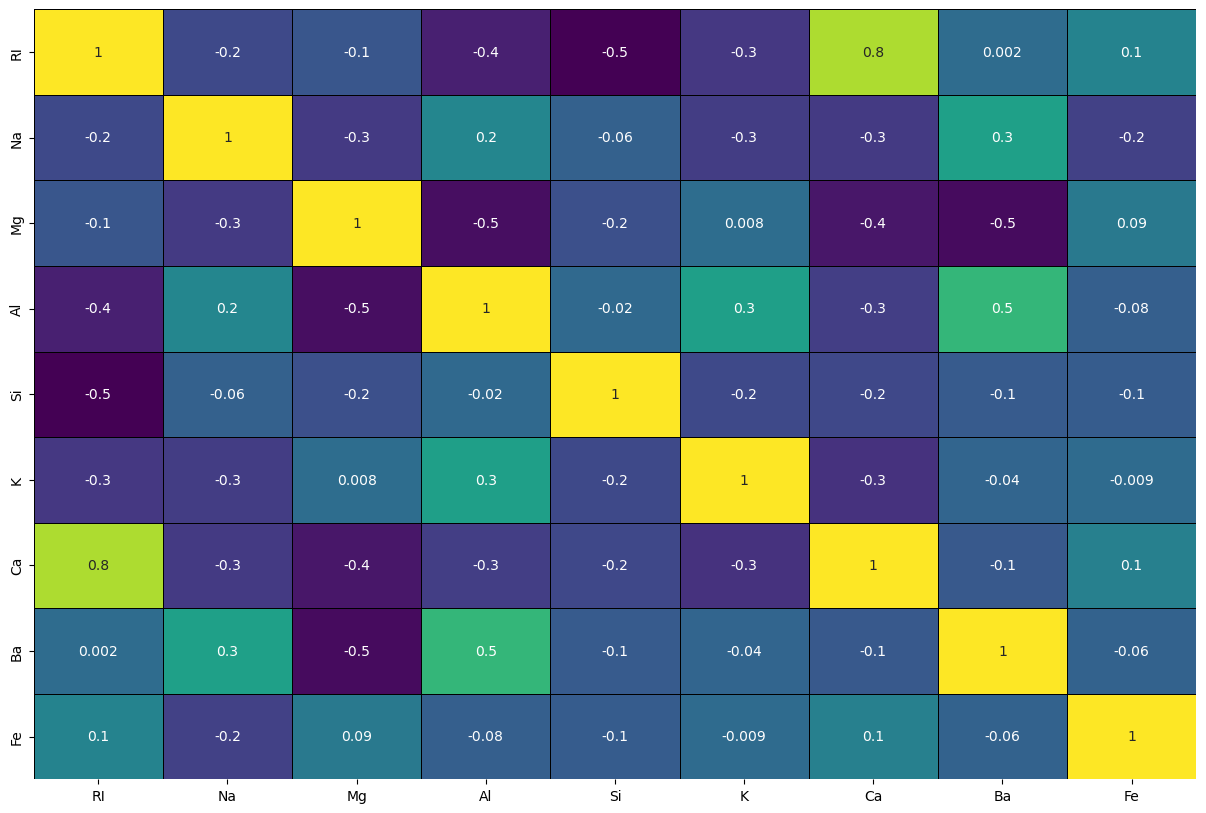

In [17]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(glass.iloc[:,:9].corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

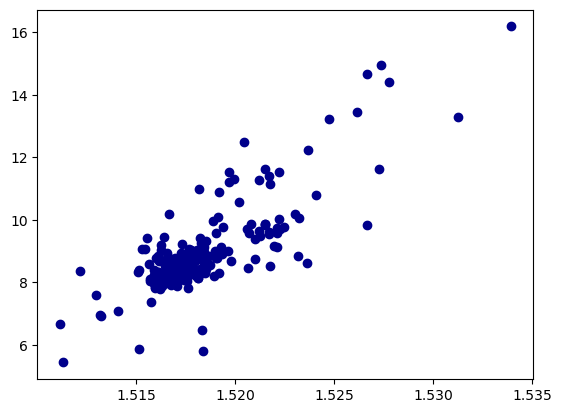

In [18]:
#color=['green']
plt.scatter(data=glass,x='RI',y='Ca',c='darkblue')

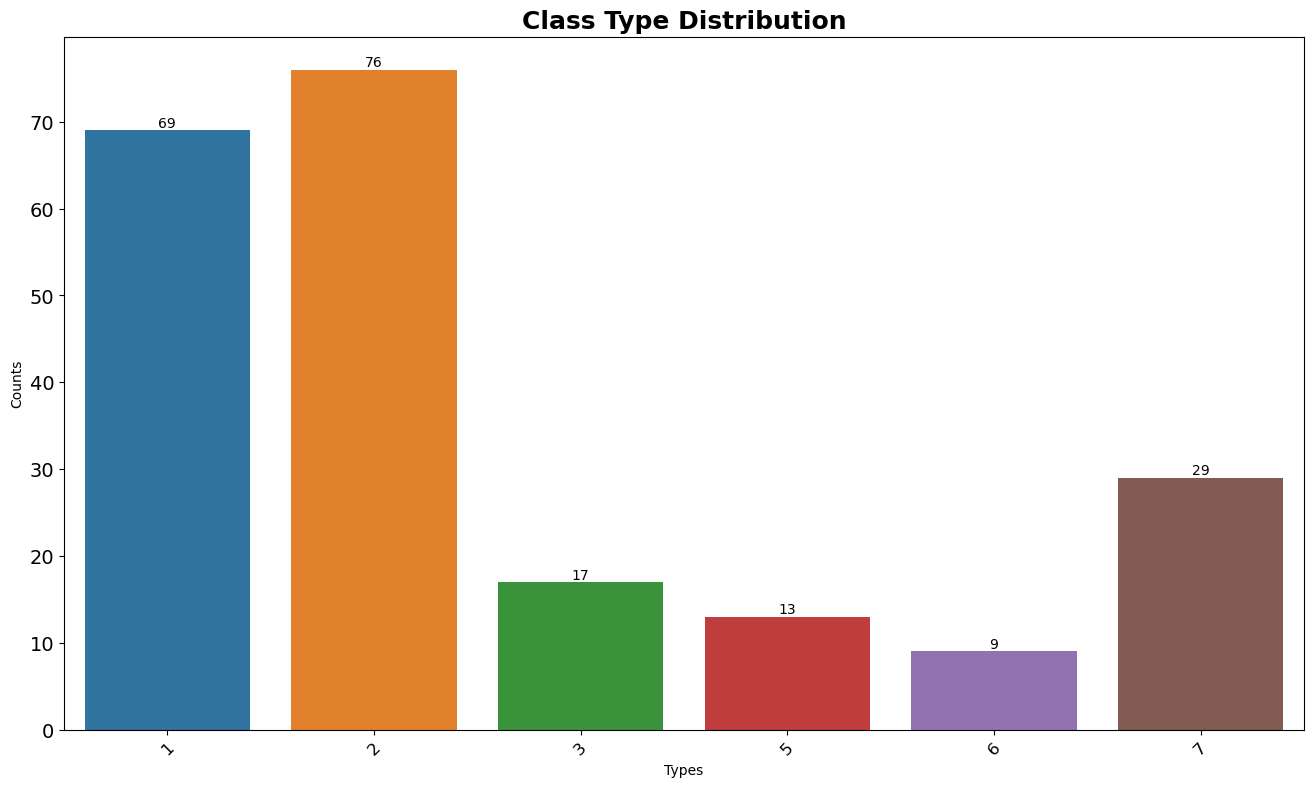

In [19]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = glass['Type'].value_counts().index.tolist(), y = glass['Type'].value_counts().tolist())
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Types')
plt.ylabel('Counts')
for i in ax.containers:
    ax.bar_label(i,)

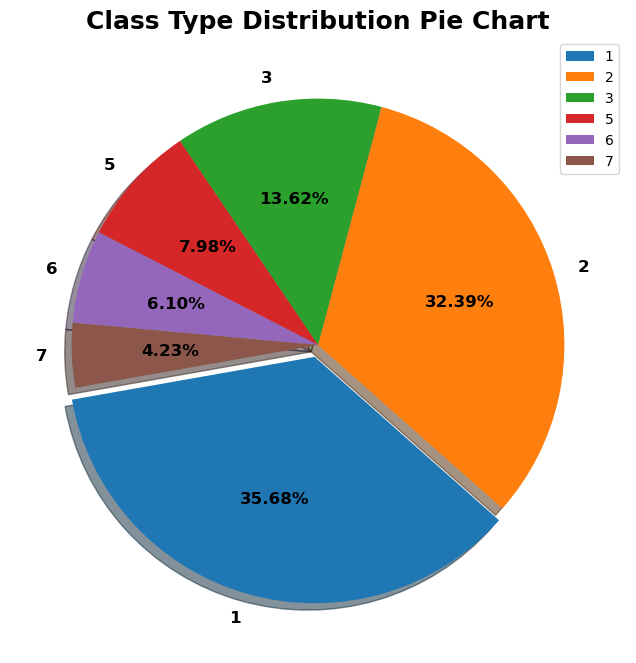

In [20]:
plt.figure(figsize = (12,8))
plt.pie(glass['Type'].value_counts(),
       labels=glass.Type.unique(),
       explode = [0.05,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

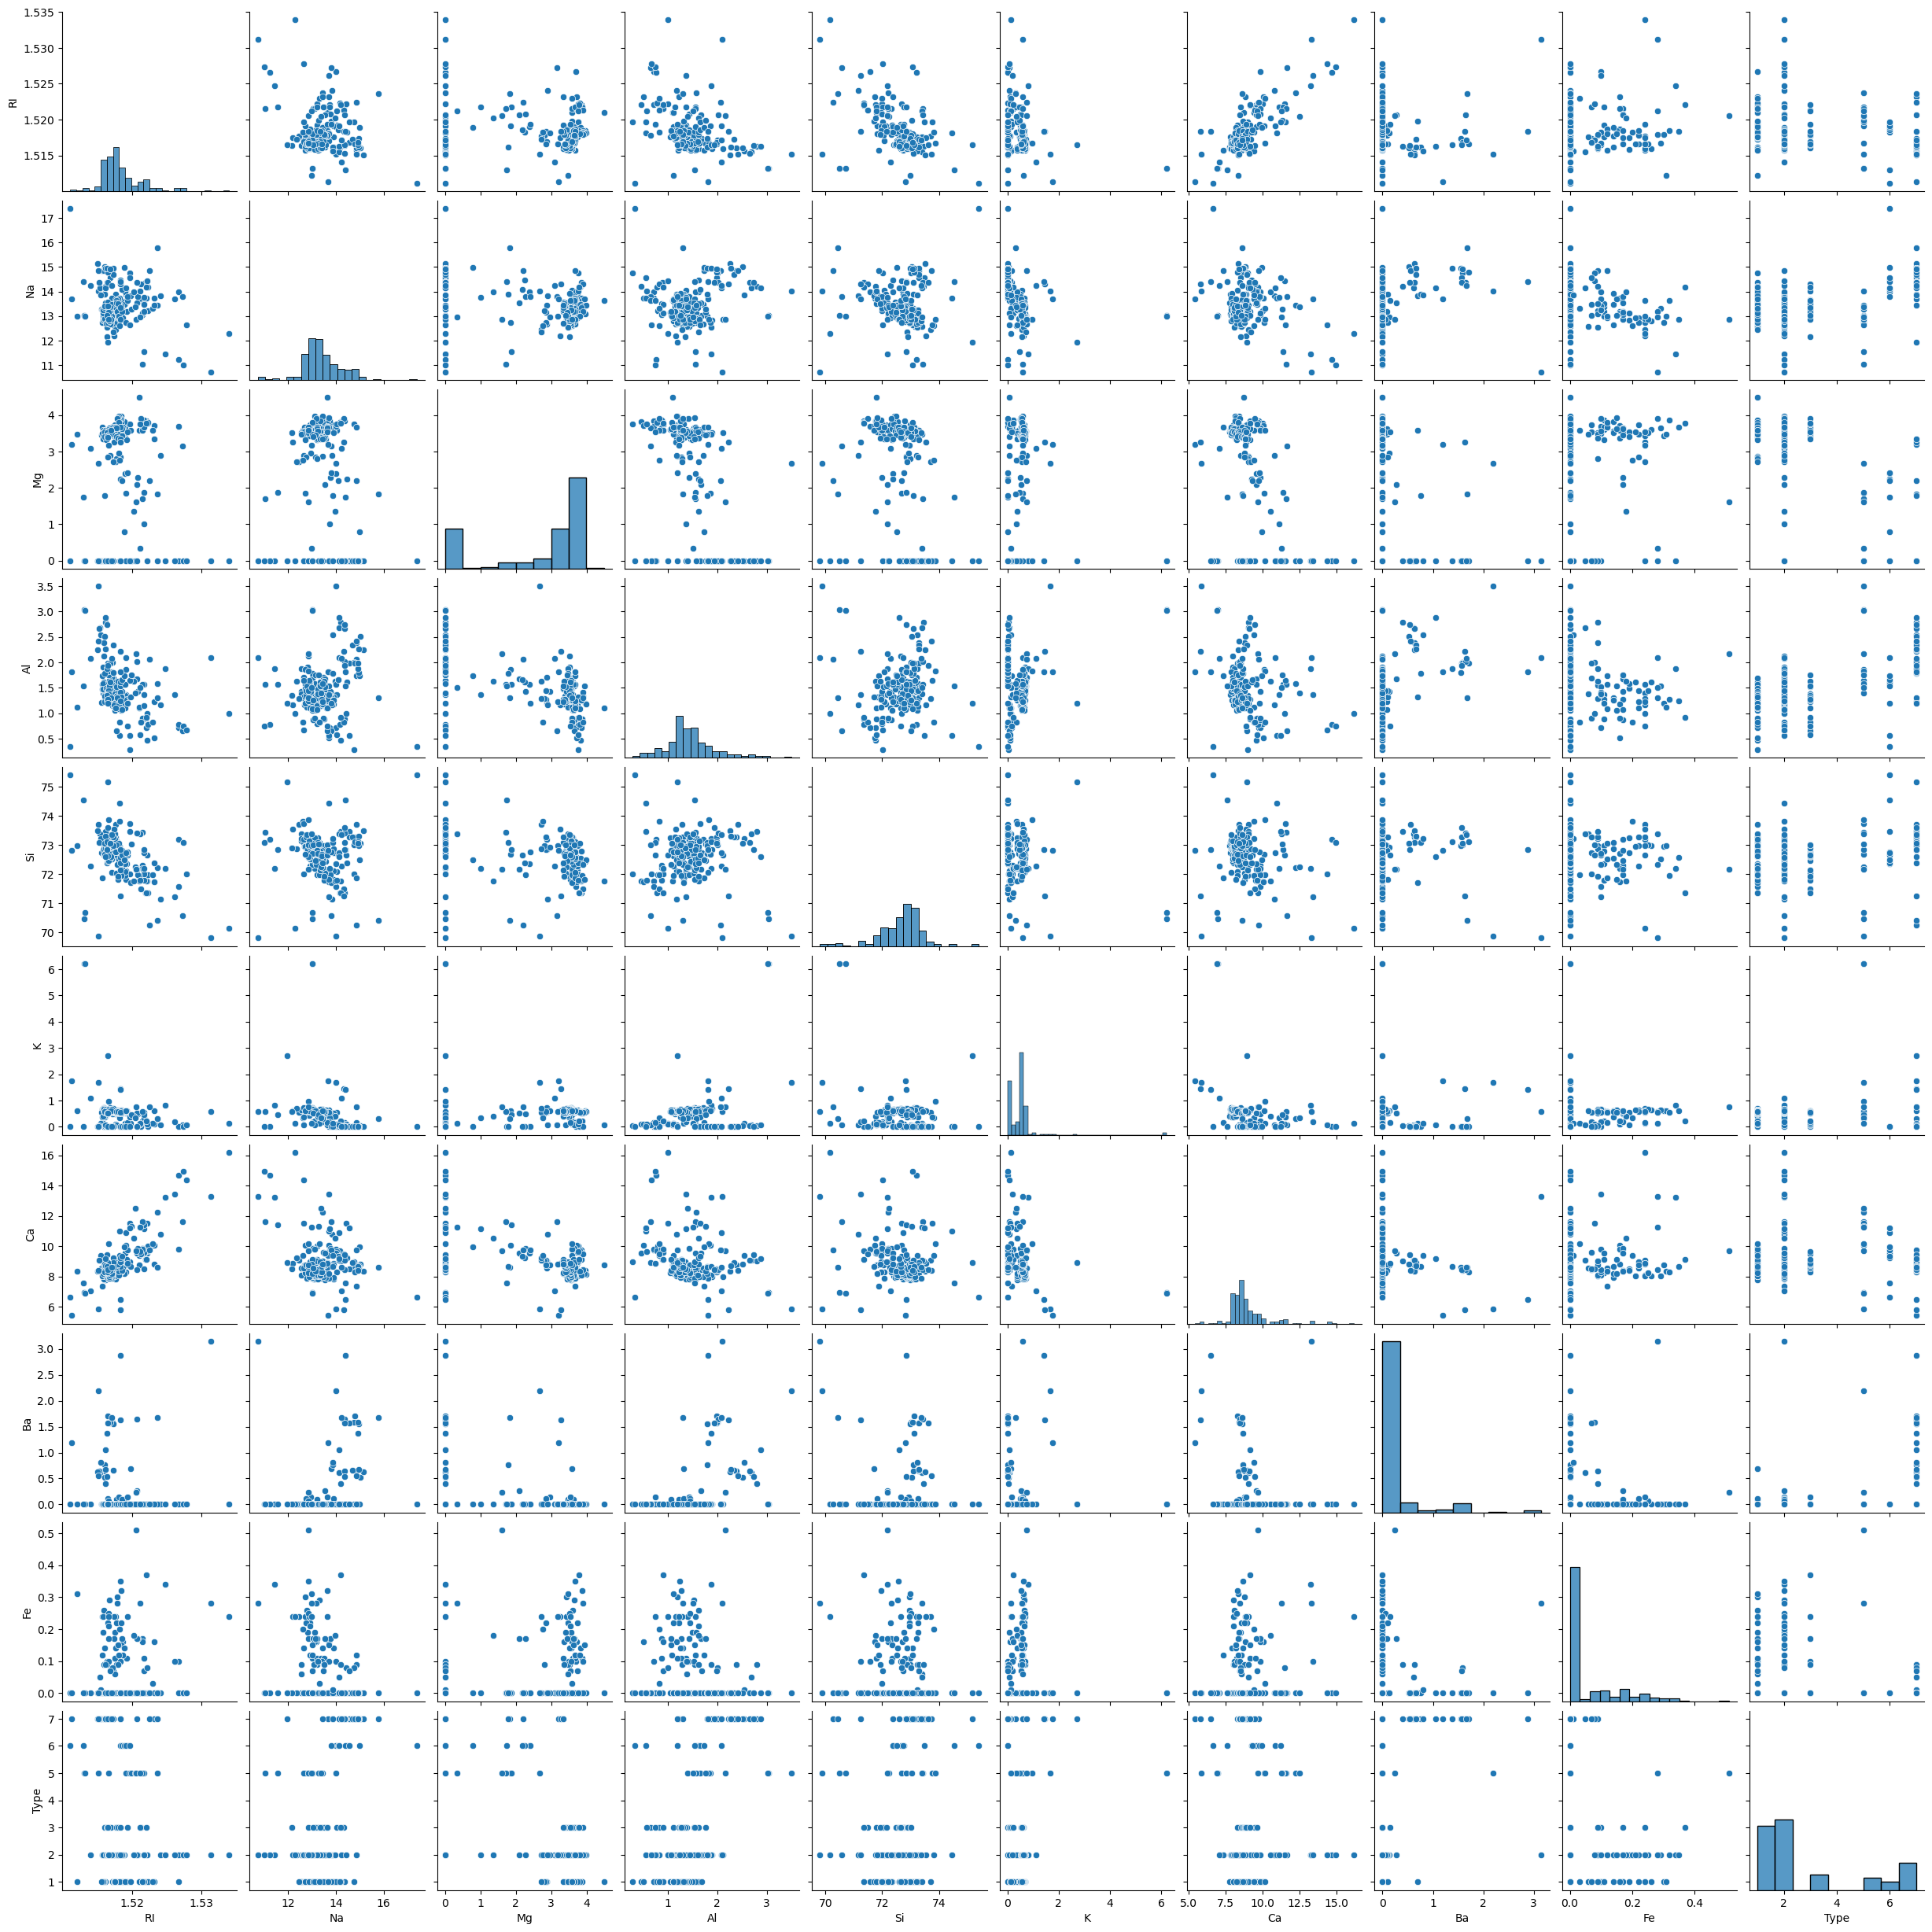

In [21]:
sns.pairplot(glass,palette='dark')

In [22]:
#split feature variables and target variable
features=glass.drop('Type',axis=1)
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [23]:
target=glass[['Type']]
target

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [24]:
#split data as training data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=0)

In [25]:
#check the shape of training data and testing data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(149, 9)
(64, 9)
(149, 1)
(64, 1)


In [26]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,Normalizer

In [27]:
cols=x_train.columns

In [28]:
std_scale=StandardScaler()
x_train=std_scale.fit_transform(x_train)
x_test=std_scale.fit_transform(x_test)

In [29]:
#put it array data to dataframe with columns name
x_train=pd.DataFrame(x_train,columns=[cols])
x_test=pd.DataFrame(x_test,columns=[cols])
x_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-0.361206,-0.664713,0.638660,-0.380667,0.807655,0.032330,-0.432241,-0.378974,1.351944
1,3.091874,-0.943135,-1.765846,-1.560682,-0.787237,-0.599424,3.618662,-0.378974,-0.599323
2,-0.200130,0.145242,0.503575,0.327342,-0.894456,0.071814,-0.142891,-0.378974,0.433700
3,-0.455168,-0.006625,0.598135,-0.616670,0.325167,-0.020316,-0.398596,-0.378974,-0.599323
4,-0.294091,-0.930480,0.638660,-0.321666,0.633423,0.124460,-0.223640,-0.378974,1.007602


In [30]:
# Using KNN to classify the glasses 
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

# Test and Evaluate model

In [31]:
# Predicting results using KNN fit. 
pred = knn.predict(x_test)
pred

array([7, 1, 2, 5, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 7, 2, 1, 3, 1, 7, 7,
       7, 7, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 7, 2, 7, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 6, 7, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5],
      dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [33]:
#accuracy check
accuracy_score(y_test,pred)

0.6875

# Grid search for choosing the best Value of K

In [34]:
n_neighbors=np.random.randint(1,20,20)

In [35]:
params= dict(n_neighbors=n_neighbors)

In [36]:
grid_search=GridSearchCV(knn,params)

In [37]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=4),
             param_grid={'n_neighbors': array([ 6, 13, 17,  9, 14,  7,  8, 14, 13,  3, 13, 13,  9,  2,  2, 10, 19,
        8,  4, 16])})

In [38]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 4}
0.6850574712643678


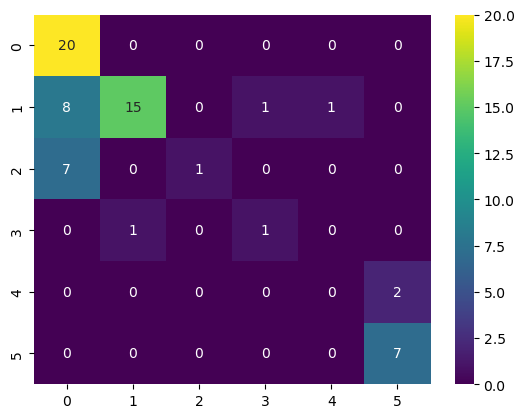

In [39]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.57      1.00      0.73        20
           2       0.94      0.60      0.73        25
           3       1.00      0.12      0.22         8
           5       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         2
           7       0.78      1.00      0.88         7

    accuracy                           0.69        64
   macro avg       0.63      0.54      0.51        64
weighted avg       0.77      0.69      0.65        64

